In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
#연령을 추가한 데이터 -> 시각화를 위해


add_age = df[["age", "stroke", "smoking_status"]]
add_age

,age,stroke,smoking_status
0,67.0,1,formerly smoked
1,61.0,1,never smoked
2,80.0,1,never smoked
3,49.0,1,smokes
4,79.0,1,never smoked
...,...,...,...
5105,80.0,0,never smoked
5106,81.0,0,never smoked
5107,35.0,0,never smoked
5108,51.0,0,formerly smoked


In [5]:
df["smoking_status"].describe()

count             5110
unique               4
top       never smoked
freq              1892
Name: smoking_status, dtype: object

In [6]:
N = df[["stroke", "smoking_status"]]
N

,stroke,smoking_status
0,1,formerly smoked
1,1,never smoked
2,1,never smoked
3,1,smokes
4,1,never smoked
...,...,...
5105,0,never smoked
5106,0,never smoked
5107,0,never smoked
5108,0,formerly smoked


In [7]:
s = N[N["stroke"] == 1]   # 뇌졸중 1  -> s, 249/5110(명)
s

,stroke,smoking_status
0,1,formerly smoked
1,1,never smoked
2,1,never smoked
3,1,smokes
4,1,never smoked
...,...,...
244,1,Unknown
245,1,Unknown
246,1,formerly smoked
247,1,Unknown


In [8]:
s_0 = N[N["stroke"] == 0] #뇌졸중 0 -> s_0,  전체 자료의 4861/5110(명) 약 95% 가 뇌졸증에 걸리지 않음
s_0

,stroke,smoking_status
249,0,Unknown
250,0,never smoked
251,0,Unknown
252,0,formerly smoked
253,0,Unknown
...,...,...
5105,0,never smoked
5106,0,never smoked
5107,0,never smoked
5108,0,formerly smoked


In [9]:
4861/5110

0.9512720156555773

In [10]:
#뇌졸중 걸린 사람 s 중에서 흡연 경험이 있는 사람   112/249(명) 약 45%

s_sm = s[(s["smoking_status"] == 'formerly smoked') | (s["smoking_status"] == 'smokes')]
s_sm

,stroke,smoking_status
0,1,formerly smoked
3,1,smokes
5,1,formerly smoked
11,1,smokes
12,1,smokes
...,...,...
239,1,smokes
240,1,formerly smoked
241,1,formerly smoked
243,1,formerly smoked


In [11]:
#뇌졸중 걸린 사람 s 중 흡연하는 사람 42/249 -> 약 17%

s_smokes = s[s["smoking_status"] == 'smokes']
s_smokes

,stroke,smoking_status
3,1,smokes
11,1,smokes
12,1,smokes
16,1,smokes
17,1,smokes
20,1,smokes
28,1,smokes
30,1,smokes
42,1,smokes
44,1,smokes


In [12]:
#뇌졸중에 걸리지 않은 사람 s_0 중에서 흡연 경험이 있는 사람  1562/4861(명)  32.1%

s_0_sm = s_0[(s_0["smoking_status"] == 'formerly smoked') | (s_0["smoking_status"] == 'smokes')]
s_0_sm

,stroke,smoking_status
252,0,formerly smoked
255,0,formerly smoked
257,0,smokes
260,0,formerly smoked
262,0,formerly smoked
...,...,...
5087,0,formerly smoked
5090,0,smokes
5093,0,smokes
5099,0,smokes


In [13]:
#한번이라도 흡연 경험이 있는 사람 1674/5110(명)  전체 데이터 중에서 한 번이라도 흡연 경험이 있는 사람은 약 33%

sm = N[(N["smoking_status"] == 'formerly smoked') | (N["smoking_status"] == 'smokes')]
sm

,stroke,smoking_status
0,1,formerly smoked
3,1,smokes
5,1,formerly smoked
11,1,smokes
12,1,smokes
...,...,...
5087,0,formerly smoked
5090,0,smokes
5093,0,smokes
5099,0,smokes


In [14]:
#흡연 경험이 있는 사람들 중 뇌졸중 걸린 사람   112/1674(명)  약 7%  아.... 느낌이 온다..... 흡연이 반드시 상관관계가 있지 않을 거라는 


sm_s = sm[sm["stroke"] == 1]
sm_s


,stroke,smoking_status
0,1,formerly smoked
3,1,smokes
5,1,formerly smoked
11,1,smokes
12,1,smokes
...,...,...
239,1,smokes
240,1,formerly smoked
241,1,formerly smoked
243,1,formerly smoked


In [15]:
#흡연여부 unknown 데이터만 추출  1544/5110(명)

Unknown = N[N["smoking_status"] == 'Unknown']
Unknown

,stroke,smoking_status
8,1,Unknown
9,1,Unknown
13,1,Unknown
19,1,Unknown
23,1,Unknown
...,...,...
5098,0,Unknown
5101,0,Unknown
5103,0,Unknown
5104,0,Unknown


In [16]:
# 흡연여부를 알 수 없는데 뇌졸중 걸린 사람 47/1544  -> 약 3%

unknown_s = Unknown[Unknown["stroke"] == 1]
unknown_s


,stroke,smoking_status
8,1,Unknown
9,1,Unknown
13,1,Unknown
19,1,Unknown
23,1,Unknown
27,1,Unknown
31,1,Unknown
38,1,Unknown
46,1,Unknown
50,1,Unknown


In [17]:
#아예 unknwon 데이터를 제외한 데이터 N_unknown  3566/5110(명)
# 그러면 never smoked= 0으로 처리하고, formerly smoked 와 smokes 를 1로 처리하자

N_unknown = N[(N["smoking_status"] == 'formerly smoked') | (N["smoking_status"] == 'never smoked') | (N["smoking_status"] == 'smokes')]
N_unknown

,stroke,smoking_status
0,1,formerly smoked
1,1,never smoked
2,1,never smoked
3,1,smokes
4,1,never smoked
...,...,...
5102,0,never smoked
5105,0,never smoked
5106,0,never smoked
5107,0,never smoked


In [18]:
#unknown 값 제거한 뒤 뇌졸중에 걸린 사람 데이터만 N_unknown_s

N_unknown_s = N_unknown[N_unknown["stroke"]==1]
N_unknown_s

,stroke,smoking_status
0,1,formerly smoked
1,1,never smoked
2,1,never smoked
3,1,smokes
4,1,never smoked
...,...,...
240,1,formerly smoked
241,1,formerly smoked
242,1,never smoked
243,1,formerly smoked


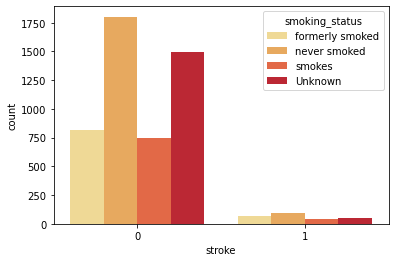

In [19]:
#전체 N데이터 countplot으로 시각화
#알 수 있는 것: 뇌졸중에 안 걸린 사람들 중에서 흡연을 한 적 없는 사람의 비중이 높은 것을 알 수 있음


sns.countplot(data = N, x="stroke", hue="smoking_status", palette="YlOrRd")
plt.show()

In [43]:
df_g = df.groupby(["stroke", "smoking_status"])["id"].count().unstack(level=-1)
df_g

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,1497,815,1802,747
1,47,70,90,42


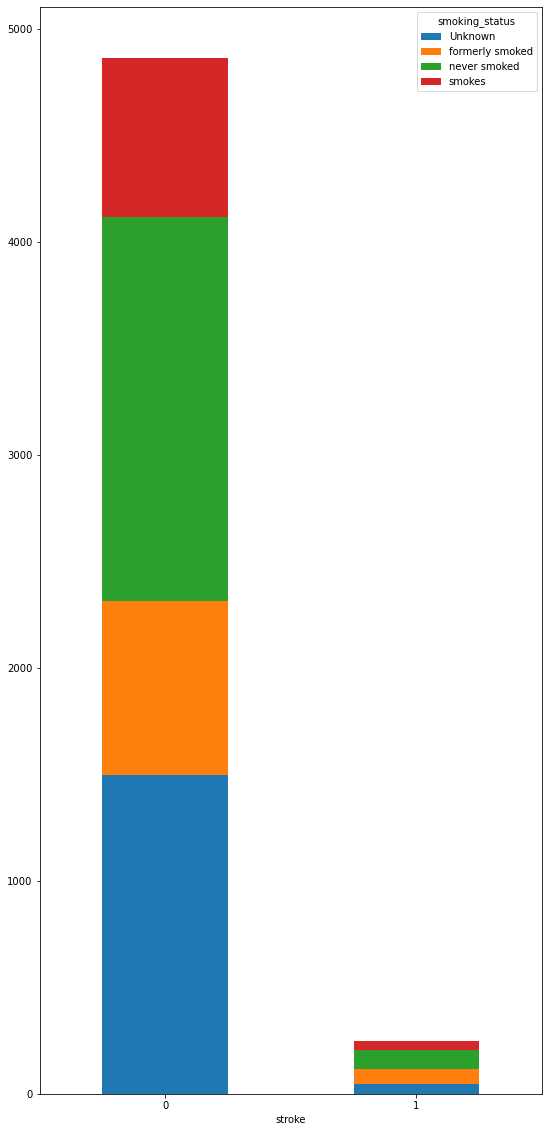

In [61]:
fig =  df_g.plot.bar(stacked=True, rot=0, figsize=(9, 20))
plt.show()

<AxesSubplot:xlabel='smoking_status'>

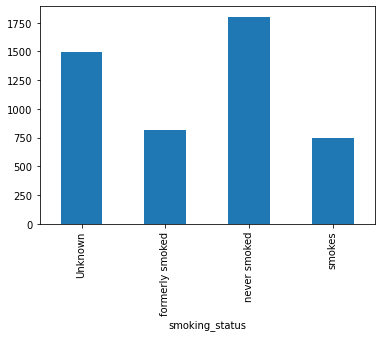

In [57]:
# df_g0 = df_g.iloc[0]
# df_g0.plot.bar(y="smoking_status", stacked=True)

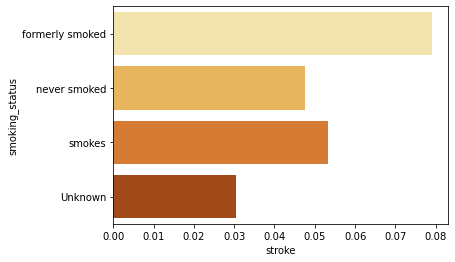

In [20]:
#뇌졸중 데이터는 0과 1밖에 없지만 다음과 같은 그래프를 통해 이전에 흡연을 한 적이 한 번이라도 있는 사람들이 뇌졸중에 걸릴 위험이 크다는 것을 밝힐 수 있음
#(1에 가장 가깝기 때문)


sns.barplot(data = N, x="stroke", y="smoking_status", ci=None, palette="YlOrBr")
plt.show()

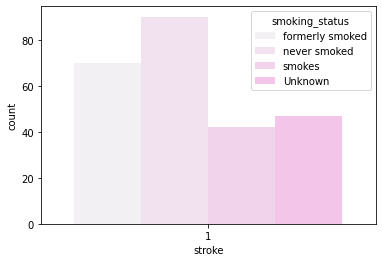

In [21]:
#뇌졸중걸린 중 흡연 상태에 따른 데이터 시각화 

sns.countplot(data=s, x="stroke", hue="smoking_status", color="#FABDED")
plt.show()

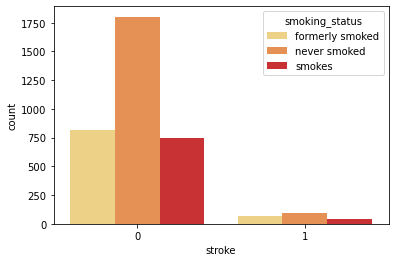

In [22]:
#흡연상태에서 unknown을 제거하고 시각화 

sns.countplot(data= N_unknown, x="stroke", hue="smoking_status", palette="YlOrRd")
plt.show()

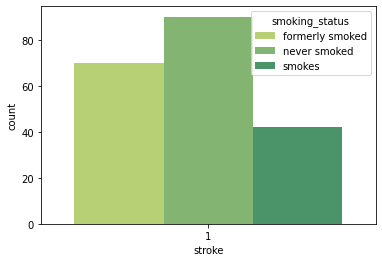

In [23]:
#unknown을 제거한 뒤 뇌졸중에 걸린 사람의 데이터만 시각화 한 것 바로 위의 그래프와 비교했을 때 흡연한 적 없는 사람의 비중이 줄어든 것을 알 수 있음


sns.countplot(data= N_unknown_s, x="stroke", hue="smoking_status", palette="summer_r")
plt.show()

In [24]:
#이건 뇌졸중에 걸린 평균 연령이 흡연한 적 없는 사람에 비해 흡연경험이 있는 사람이 높음을 알 수 있음

pivot = add_age.pivot_table(index='smoking_status', columns="stroke", values="age")
pivot

stroke,0,1
smoking_status,,
Unknown,29.112011,65.836596
formerly smoked,53.753374,68.628571
never smoked,45.567703,70.311111
smokes,46.212851,62.809524


<AxesSubplot:xlabel='stroke', ylabel='smoking_status'>

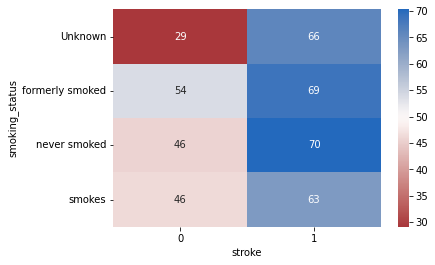

In [25]:
#각 흡연 상태별 뇌졸중 평균 연령 시각화한 것, 흡연한 사람의 뇌졸중 발생 평균 연령이 낮은 것을 확인할 수 있음

sns.heatmap(pivot, annot=True, cmap="vlag_r")

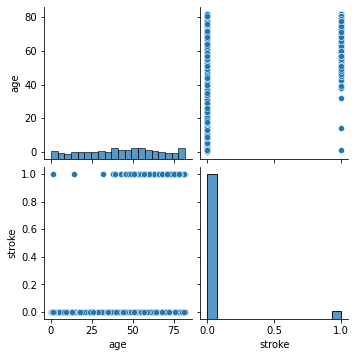

In [26]:
#기본적으로 뇌졸중에 걸린 사람보다 걸리지 않은 사람이 많은 데이터임을 시각적으로 알려줌 
#뭔가 좀 부족한 그래프인데


sns.pairplot(add_age)

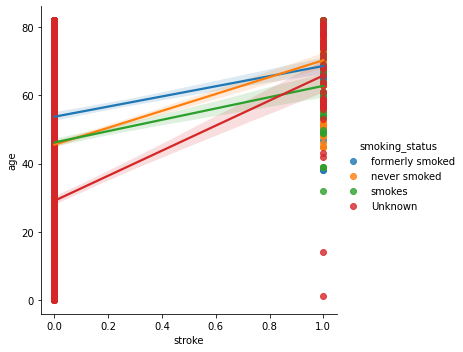

In [27]:
#사용할 수 없는 자료임, 그러나 연령과 뇌졸중과의 상관관계를 분명히 드러내고 있으며 흡연경험이 있는 경우 그 기울기가 완만해지는 것으로 보아 발병 시점을 앞당긴다고도 볼 수 있겠음
#어쨌든 사용할 수 없는 자료, x축, y축 모두에 연속적인 숫자형의 데이터가 왔어야 함

sns.lmplot(data=add_age,x="stroke", y="age", hue="smoking_status" )

In [28]:
# 상관관계 분석 : 뇌졸중과 흡연 사이의 상관관계를 분석하고 싶은데 흡연 상태가 숫자가 아닐 때 

import pingouin as pg

# pg.ttest



In [29]:
add_age.corr()

,age,stroke
age,1.000000,0.245257
stroke,0.245257,1.000000


In [30]:
# pg.plot_paired(data=add_age, dv="age", within="stroke", subject="smoking_status")
# 어디에도 쓸 수 없는 다소 모자란 시각화 

In [31]:
from statsmodels.formula.api import ols

m = ols("stroke ~ smoking_status ", data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     9.764
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           2.02e-06
Time:                        10:28:17   Log-Likelihood:                 611.41
No. Observations:                5110   AIC:                            -1215.
Df Residuals:                    5106   BIC:                            -1189.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.0304      0.005      5.569      0.000       0.020       0.041
smoking_status[T.formerly smoked]     0.0487      0.009      5.373      0.000       0.031       0.066
smoking_status[T.never smoked]        0.0171      0.007      2.325      0.020       0.003       0.032
smoking_status[T.smokes]              0.0228      0.009      2.425      0.015       0.004       0.041
==============================================================================
Omnibus:                     4221.319   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65211.493
Skew:                           4.156   Prob(JB):                         0.00
Kurtosis:                      18.400   Cond. No.                         4.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='age', ylabel='stroke'>

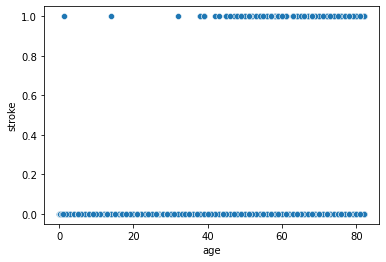

In [32]:
sns.scatterplot(data=add_age, x="age", y="stroke")

/Users/sohikwon/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sohikwon/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sohikwon/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sohikwon/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 66.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


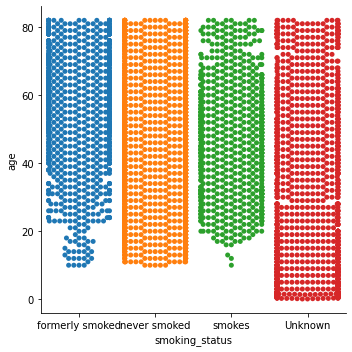

In [33]:
sns.catplot(data=add_age, x="smoking_status", y="age", kind="swarm")
# plt.show(figsize=(13,12))

<AxesSubplot:xlabel='smoking_status'>

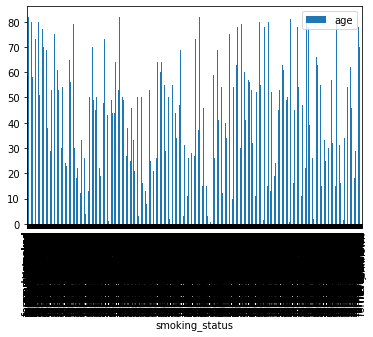

In [40]:
add_age.plot.bar(x="smoking_status", y="age", stacked=True)   #채은님 추천 하지만 데이터 자체가 연속된 숫자로 이루어진 것이 거의 없어서 fail